<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаба 3.7: Бустинг (AdaBoost, LogitBoost, BrownBoost)

## Получение данных

In [1]:
import kagglehub

dataset_path = kagglehub.dataset_download("zeddmaxx/predicting-a-biological-response")

100%|██████████| 4.51M/4.51M [00:00<00:00, 6.50MB/s]

Extracting files...


In [6]:
import pandas as pd

train = pd.read_csv(dataset_path + "/train.csv")
test = pd.read_csv(dataset_path + "/test.csv")

print(f"Размерность тренировочных данных: {train.shape}")
print(f"Размерность тестовый данных: {test.shape}")

Размерность тренировочных данных: (3751, 1777)
Размерность тестовый данных: (2501, 1776)


In [8]:
train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


## Практические задания

### 1. Постройте график зависимости точности классификации и времени работы AdaBoost, LogitBoost, BrownBoost от максимального количества итераций.

In [15]:
work_time = []
accuracy_scores = []

In [16]:
from sklearn.model_selection import train_test_split

X = train.drop('Activity', axis=1)
y = train['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размерность тренировочной выборки Х: {X_train.shape}")
print(f"Размерность тестовой выборки Х: {X_test.shape}")
print(f"Размерность тренировочной выборки y: {y_train.shape}")
print(f"Размерность тестовой выборки y: {y_test.shape}")

Размерность тренировочной выборки Х: (3000, 1776)
Размерность тестовой выборки Х: (751, 1776)
Размерность тренировочной выборки y: (3000,)
Размерность тестовой выборки y: (751,)


In [ ]:
n_estimators_range = range(1, 151, 10)

#### AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

for n_estimators in n_estimators_range:
    ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators, random_state=42)

    start_time = time.time()
    ada_boost.fit(X_train, y_train)
    end_time = time.time()

    y_pred = ada_boost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    work_time.append(end_time - start_time)
    accuracy_scores.append(accuracy)

#### LogitBoost

In [38]:
!pip install daal4py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 105.3 MB/s eta 0:00:00
  Attempting uninstall: tbb
    Found existing installation: tbb 2022.2.0
    Uninstalling tbb-2022.2.0:
      Successfully uninstalled tbb-2022.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl 2025.2.0 requires tbb==2022.*, but you have tbb 2021.13.1 which is incompatible.


In [42]:
import daal4py as d4p
from sklearn.metrics import accuracy_score
import time
import numpy as np

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)

for n_estimators in n_estimators_range:
    logit_boost_train = d4p.logitboost_training(nClasses=2, maxIterations=n_estimators)

    start_time = time.time()
    train_result = logit_boost_train.compute(X_train_np, y_train_np)
    end_time = time.time()

    logit_boost_predict = d4p.logitboost_prediction(nClasses=2)

    predict_result = logit_boost_predict.compute(X_test_np, train_result.model)

    y_pred = predict_result.prediction
    accuracy = accuracy_score(y_test_np, y_pred)

    work_time.append(end_time - start_time)
    accuracy_scores.append(accuracy)

#### BrownBoost

In [44]:
import daal4py as d4p
from sklearn.metrics import accuracy_score
import time
import numpy as np

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)

for n_estimators in n_estimators_range:
    brown_boost_train = d4p.brownboost_training(nClasses=2, maxIterations=n_estimators)

    start_time = time.time()
    train_result = brown_boost_train.compute(X_train_np, y_train_np)
    end_time = time.time()

    brown_boost_predict = d4p.brownboost_prediction(nClasses=2)

    predict_result = brown_boost_predict.compute(X_test_np, train_result.model)

    y_pred = predict_result.prediction.round().astype(int)
    accuracy = accuracy_score(y_test_np, y_pred)

    work_time.append(end_time - start_time)
    accuracy_scores.append(accuracy)

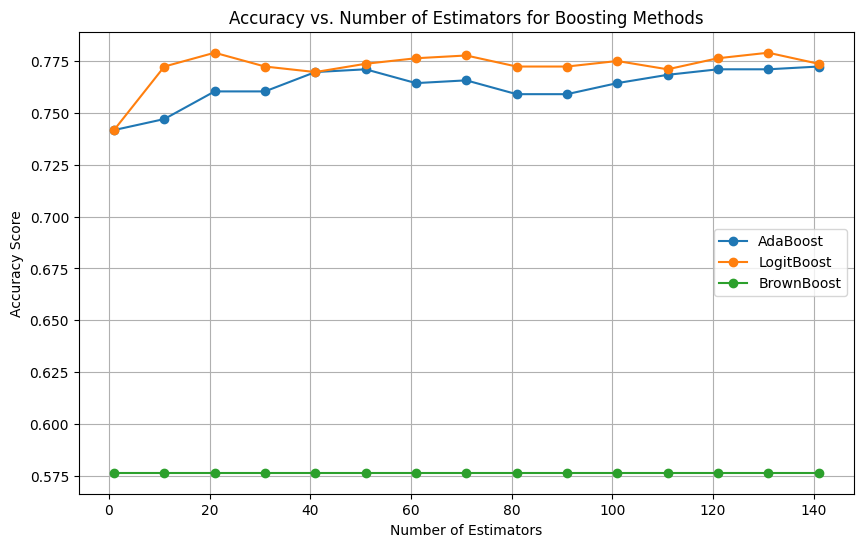

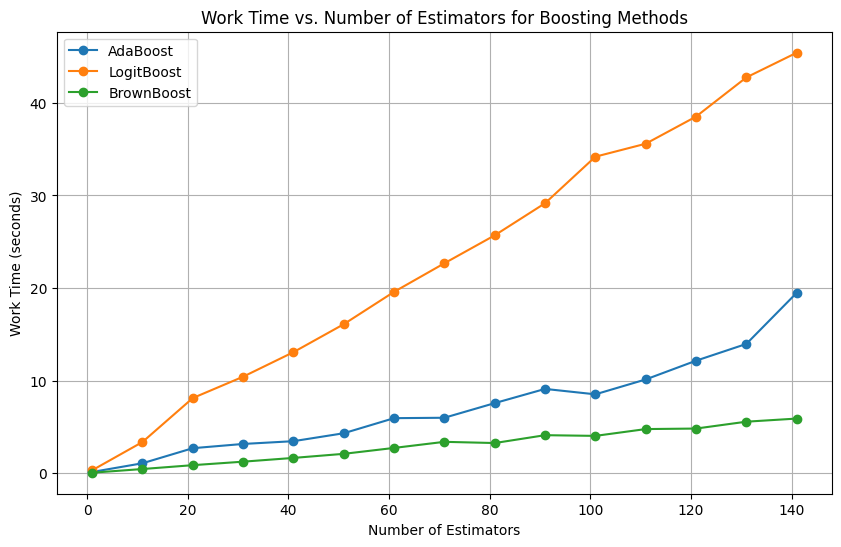

In [46]:
import matplotlib.pyplot as plt
import numpy as np

data_points_per_booster = 15

work_time_ada = work_time[:data_points_per_booster]
accuracy_scores_ada = accuracy_scores[:data_points_per_booster]

work_time_logit = work_time[data_points_per_booster:data_points_per_booster*2]
accuracy_scores_logit = accuracy_scores[data_points_per_booster:data_points_per_booster*2]

work_time_brown = work_time[data_points_per_booster*2:]
accuracy_scores_brown = accuracy_scores[data_points_per_booster*2:]


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores_ada, marker='o', label='AdaBoost')
plt.plot(n_estimators_range, accuracy_scores_logit, marker='o', label='LogitBoost')
plt.plot(n_estimators_range, accuracy_scores_brown, marker='o', label='BrownBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs. Number of Estimators for Boosting Methods')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, work_time_ada, marker='o', label='AdaBoost')
plt.plot(n_estimators_range, work_time_logit, marker='o', label='LogitBoost')
plt.plot(n_estimators_range, work_time_brown, marker='o', label='BrownBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Work Time (seconds)')
plt.title('Work Time vs. Number of Estimators for Boosting Methods')
plt.legend()
plt.grid(True)
plt.show()

### 2. Постройте график зависимости точности классификации и времени работы BrownBoost от значений параметров 𝜀 и 𝜈.

In [70]:
import math
import numpy as np
from scipy import special
import random
import copy as cp
from sklearn.tree import DecisionTreeClassifier


class BrownBoost:

    def __init__(self, weakLearner, c=10, nu=0, stop_criterion=0.01):
        """ Initiates BrownBoost classifier

        :param weakLearner: the boosted weak learner
        :param c:
        :param nu:
        :param stop_criterion:
        """
        self.weakLearner = weakLearner
        self.c = c
        self.nu = nu
        self.stop_criterion = stop_criterion
        self.alphas = []
        self.H = []

    def fit(self, X, Y):
        """ Trains the classifier

        Parameters:
            X -- array-like
                The training input samples.
            Y -- array-like
                The target values
        Returns:
            self
        """

        # Initiate parameters
        self.alphas = []
        self.Hs = []
        s = self.c
        R = np.zeros(X.shape[0])
        k=0
        maxK = 1000
        while s > 0 and k < maxK :
            k += 1

            # Weights update
            W = np.exp(-(R + s) ** 2 / self.c)

            # Weak learner training
            h = cp.deepcopy(self.weakLearner)
            h.fit(X, Y, sample_weight=W)

            # Prediction
            H = h.predict(X)

            # Correlation, used in initializing alpha
            gamma = (W * H * Y).sum()

            # Solve equation => extract t and alpha
            alpha, t = self.solveEq(R, H, s, gamma, Y)

            # Update margins
            R = R + alpha * H * Y
            # Update remaining time
            s = s - t

            # For final prediction
            self.alphas.append(alpha)
            self.Hs.append(h)

    def predict(self, X):
        """ Classify the samples

        Parameters:
            X -- array-like
                The training input samples.
        Returns:
            Y -- array of shape = [n_samples]
                The predicted values
        """

        Y = np.zeros(X.shape[0])
        for i in range(0, len(self.Hs)):
            Y += self.alphas[i] * self.Hs[i].predict(X)
        return np.sign(Y)

    def solveEq(self, R, H, s, gamma, Y):
        """ Computes alpha and t

        Parameters :
            R -- array
                margins for the samples
            H -- array
                predicted values
            s -- float
                'time remaining'
            gamma -- float
                correlation
            Y -- array-like
                the target values
        Returns :
            alpha -- float
            t -- float
        """

        # Starting point
        alpha = min([0.25, gamma])
        t = (alpha ** 2) / 3

        A = R + s
        B = H * Y

        k = 0
        maxK = 1000
        variation = self.stop_criterion + 1

        while k < maxK and variation > self.stop_criterion:
            D = A + (alpha * B - t)
            W = np.exp(-(D ** 2) / self.c)

            # Coefficients for computing alpha and t (jacobian)
            w = W.sum()
            u = (W * D * B).sum()
            b = (W * B).sum()
            v = (W * D * (B ** 2)).sum()
            e = (special.erf(D / math.sqrt(self.c)) - special.erf(A / math.sqrt(self.c))).sum()

            # alpha and t update
            sqrtPiC = math.sqrt(math.pi * self.c)
            alpha_1 = alpha + (self.c * w * b + sqrtPiC * u * e) / 2 * (u * w - u * b)
            t_1 = t + (self.c * (b ** 2) + sqrtPiC * v * e) / 2 * (u * w - u * b)
            # Variation with previous iteration
            variation = math.sqrt((alpha - alpha_1) ** 2 + (t - t_1) ** 2)

            alpha = alpha_1
            t = t_1

            k += 1

        return alpha, t


# if __name__ == '__main__':
#     print('Start')
#     X = np.zeros((100, 10))
#     Y = np.ones(100)
#
#     dt = DecisionTreeClassifier(max_depth=1)
#     BB = BrownBoost(dt)
#     BB.fit(X, Y)
#     BB.predict(X)

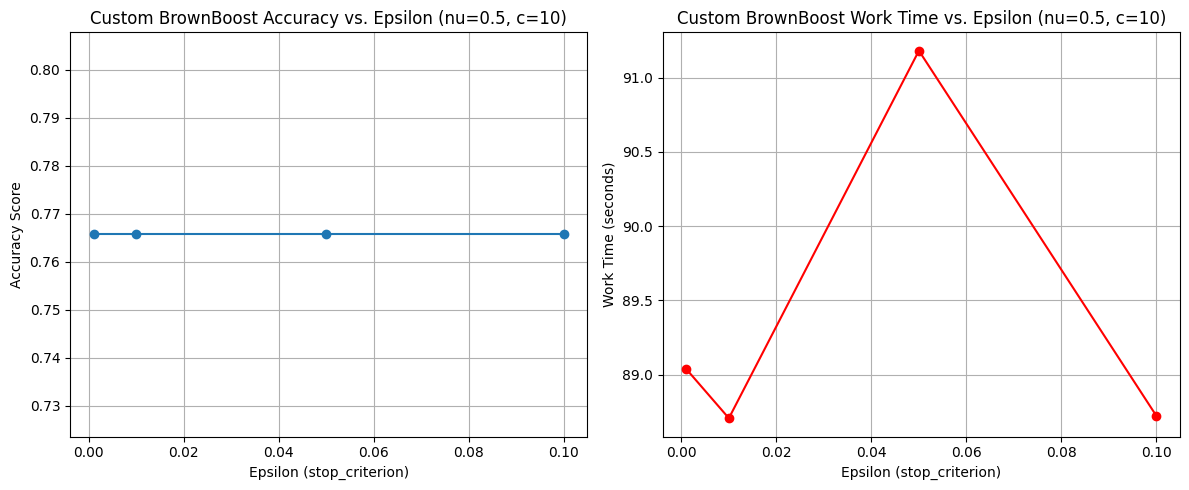

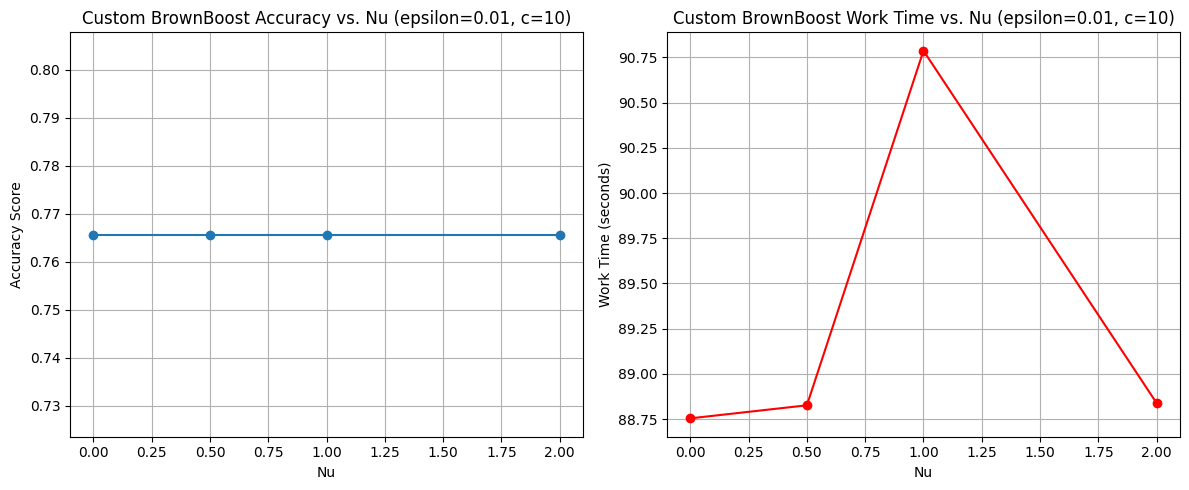

In [71]:
import matplotlib.pyplot as plt
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

epsilon_range = [0.001, 0.01, 0.05, 0.1]
nu_range = [0, 0.5, 1.0, 2.0]
fixed_c = 10
n_estimators_placeholder = 100

accuracy_scores_epsilon_custom = []
work_time_epsilon_custom = []

accuracy_scores_nu_custom = []
work_time_nu_custom = []

fixed_nu_param = 0.5
for epsilon_param in epsilon_range:
    bb_custom = BrownBoost(weakLearner=DecisionTreeClassifier(max_depth=1), c=fixed_c, nu=fixed_nu_param, stop_criterion=epsilon_param)

    start_time = time.time()
    bb_custom.fit(X_train.to_numpy(), y_train.to_numpy())
    end_time = time.time()

    y_pred_custom = bb_custom.predict(X_test.to_numpy())
    accuracy_custom = accuracy_score(y_test.to_numpy(), y_pred_custom)

    accuracy_scores_epsilon_custom.append(accuracy_custom)
    work_time_epsilon_custom.append(end_time - start_time)

fixed_epsilon_param = 0.01
for nu_param in nu_range:
    bb_custom = BrownBoost(weakLearner=DecisionTreeClassifier(max_depth=1), c=fixed_c, nu=nu_param, stop_criterion=fixed_epsilon_param)

    start_time = time.time()
    bb_custom.fit(X_train.to_numpy(), y_train.to_numpy())
    end_time = time.time()

    y_pred_custom = bb_custom.predict(X_test.to_numpy())
    accuracy_custom = accuracy_score(y_test.to_numpy(), y_pred_custom)

    accuracy_scores_nu_custom.append(accuracy_custom)
    work_time_nu_custom.append(end_time - start_time)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epsilon_range, accuracy_scores_epsilon_custom, marker='o')
plt.xlabel('Epsilon (stop_criterion)')
plt.ylabel('Accuracy Score')
plt.title(f'Custom BrownBoost Accuracy vs. Epsilon (nu={fixed_nu_param}, c={fixed_c})')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epsilon_range, work_time_epsilon_custom, marker='o', color='r')
plt.xlabel('Epsilon (stop_criterion)')
plt.ylabel('Work Time (seconds)')
plt.title(f'Custom BrownBoost Work Time vs. Epsilon (nu={fixed_nu_param}, c={fixed_c})')
plt.grid(True)

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(nu_range, accuracy_scores_nu_custom, marker='o')
plt.xlabel('Nu')
plt.ylabel('Accuracy Score')
plt.title(f'Custom BrownBoost Accuracy vs. Nu (epsilon={fixed_epsilon_param}, c={fixed_c})')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(nu_range, work_time_nu_custom, marker='o', color='r')
plt.xlabel('Nu')
plt.ylabel('Work Time (seconds)')
plt.title(f'Custom BrownBoost Work Time vs. Nu (epsilon={fixed_epsilon_param}, c={fixed_c})')
plt.grid(True)

plt.tight_layout()
plt.show()

### 3. Выполните предобработку данных

In [93]:
train_copy = train.copy()

In [94]:
import scipy.stats as stats
import numpy as np
import pandas as pd

def get_outlier_indices_grubbs(data, alpha=0.05):
  """
  Checks for outliers in a single column using Grubb's test and returns their indices.

  Args:
    data: A pandas Series representing a single column.
    alpha: Significance level for the test.

  Returns:
    A list of indices of the outliers in the column.
  """
  n = len(data)
  if n < 3:
      return []

  mean_t = np.mean(data)
  sd_t = np.std(data, ddof=1)

  if sd_t == 0:
      return []

  abs_dev = abs(data - mean_t)
  max_abs_dev = np.max(abs_dev)
  g_calc = max_abs_dev / sd_t

  outlier_index = data.index[np.argmax(abs_dev)]

  t_value = stats.t.ppf(1 - alpha / (2 * n), n - 2)
  g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))

  if g_calc > g_critical:
    return [outlier_index]
  else:
    return []

train_copy_grubbs = train.copy()

all_outlier_indices = set()

for col in train_copy_grubbs.columns.drop('Activity'):
    outlier_indices_col = get_outlier_indices_grubbs(train_copy_grubbs[col])
    all_outlier_indices.update(outlier_indices_col)

all_outlier_indices = list(all_outlier_indices)

train_cleaned_grubbs = train_copy_grubbs.drop(all_outlier_indices)

print(f"Original training data shape: {train.shape}")
print(f"Number of outliers detected by Grubb's test across all columns: {len(all_outlier_indices)}")
print(f"Shape of training data after removing outliers (Grubb's test): {train_cleaned_grubbs.shape}")
display(train_cleaned_grubbs.head())

Original training data shape: (3751, 1777)
Number of outliers detected by Grubb's test across all columns: 243
Shape of training data after removing outliers (Grubb's test): (3508, 1777)


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.0000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0333,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
4,0,0.1000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
8,1,0.0000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,...,0,0,0,0,0,0,0,0,0,0
9,0,0.1000,0.768150,0.10,0.25,0.262299,0.598972,0.377065,0.394514,0.673797,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.neighbors import LocalOutlierFactor

lof_model = LocalOutlierFactor(n_neighbors=100)
df_copy_lof = train_cleaned_grubbs.copy()

df_copy_lof["is_anomaly"] = lof_model.fit_predict(df_copy_lof[:])

df_copy_lof['is_anomaly'] = df_copy_lof['is_anomaly'].map({1: 0, -1: 1})

anomalies_lof = df_copy_lof[df_copy_lof['is_anomaly'] == 1]

print(f"Размер данных до удаления аномалий LOF: {df_copy_lof.shape}")
train_cleaned = train_cleaned_grubbs.drop(anomalies_lof.index)
print(f"Размер данных после удаления аномалий LOF: {train_cleaned.shape}")

Размер данных до удаления аномалий LOF: (3508, 1778)
Размер данных после удаления аномалий LOF: (3349, 1777)


In [96]:
X = train_cleaned.drop('Activity', axis=1)
y = train_cleaned['Activity']

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=0.95, svd_solver='full', random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Выбрано компонент PCA для 95% дисперсии:", pca.n_components_)
print("Форма после PCA: train:", X_train_pca.shape, " test:", X_test_pca.shape)
print("Суммарная объяснённая дисперсия (где-то ≈0.95):", np.round(np.sum(pca.explained_variance_ratio_), 4))

Выбрано компонент PCA для 95% дисперсии: 445
Форма после PCA: train: (2679, 445)  test: (670, 445)
Суммарная объяснённая дисперсия (где-то ≈0.95): 0.9501


### 4. Оцените точность классификаторов, найденных AdaBoost, LogitBoost, BrownBoost

#### AdaBoost

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

ada_boost_test = AdaBoostClassifier(
  estimator=DecisionTreeClassifier(max_depth=1),
  n_estimators=500,
  random_state=42
)

ada_boost_test.fit(X_train_pca, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=500, random_state=42)

#### LogitBoost

In [109]:
import daal4py as d4p
from sklearn.metrics import accuracy_score
import time
import numpy as np

X_train_np = X_train_pca
X_test_np = X_test_pca
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)

logit_boost_test = d4p.logitboost_training(nClasses=2, maxIterations=500)

train_result_logit = logit_boost_test.compute(X_train_np, y_train_np)

logit_boost_test_predict = d4p.logitboost_prediction(nClasses=2)

#### BrownBoost

In [110]:
import daal4py as d4p
from sklearn.metrics import accuracy_score
import time
import numpy as np

X_train_np = X_train_pca
X_test_np = X_test_pca
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)

brown_boost_test = d4p.brownboost_training(nClasses=2, maxIterations=500)

train_result_brown = brown_boost_test.compute(X_train_np, y_train_np)

brown_boost_test_predict = d4p.brownboost_prediction(nClasses=2)

#### XGBoost

In [106]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    learning_rate=0.02,
    n_estimators=500,
    objective="binary:logistic",
)

xgb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

#### CatBoost

In [100]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


In [107]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier()

catboost_model.fit(X_train_pca, y_train)

Learning rate set to 0.015692
0:	learn: 0.6904484	total: 196ms	remaining: 3m 15s
1:	learn: 0.6877567	total: 309ms	remaining: 2m 34s
2:	learn: 0.6848015	total: 420ms	remaining: 2m 19s
3:	learn: 0.6824505	total: 532ms	remaining: 2m 12s
4:	learn: 0.6802288	total: 640ms	remaining: 2m 7s
5:	learn: 0.6778747	total: 770ms	remaining: 2m 7s
6:	learn: 0.6749926	total: 879ms	remaining: 2m 4s
7:	learn: 0.6720571	total: 992ms	remaining: 2m 2s
8:	learn: 0.6687155	total: 1.1s	remaining: 2m 1s
9:	learn: 0.6662996	total: 1.22s	remaining: 2m
10:	learn: 0.6644431	total: 1.33s	remaining: 1m 59s
11:	learn: 0.6623619	total: 1.44s	remaining: 1m 58s
12:	learn: 0.6594268	total: 1.55s	remaining: 1m 57s
13:	learn: 0.6572266	total: 1.66s	remaining: 1m 57s
14:	learn: 0.6551967	total: 1.77s	remaining: 1m 56s
15:	learn: 0.6535420	total: 1.9s	remaining: 1m 56s
16:	learn: 0.6508698	total: 2.01s	remaining: 1m 56s
17:	learn: 0.6488966	total: 2.12s	remaining: 1m 55s
18:	learn: 0.6468370	total: 2.23s	remaining: 1m 55s
19:

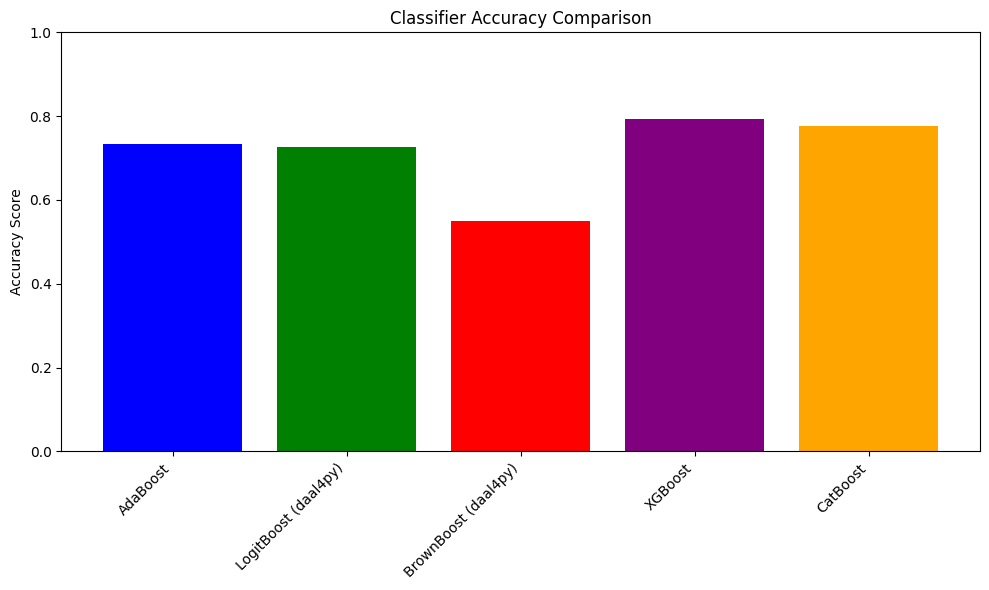

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_pred_ada = ada_boost_test.predict(X_test_pca)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

predict_result_logit = logit_boost_test_predict.compute(X_test_np, train_result_logit.model) # Assuming train_result is from LogitBoost training
y_pred_logit = predict_result_logit.prediction
accuracy_logit = accuracy_score(y_test_np, y_pred_logit)

predict_result_brown = brown_boost_test_predict.compute(X_test_np, train_result_brown.model) # Assuming train_result is from BrownBoost training
y_pred_brown = predict_result_brown.prediction.round().astype(int)
accuracy_brown = accuracy_score(y_test_np, y_pred_brown)

y_pred_xgb = xgb_model.predict(X_test_pca)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

y_pred_catboost = catboost_model.predict(X_test_pca)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

models = ['AdaBoost', 'LogitBoost (daal4py)', 'BrownBoost (daal4py)', 'XGBoost', 'CatBoost']
accuracies = [accuracy_ada, accuracy_logit, accuracy_brown, accuracy_xgb, accuracy_catboost]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylabel('Accuracy Score')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()